<a href="https://colab.research.google.com/github/vijayalaxmishirnal01/Brainwave-Matrix-Solutions-Intern/blob/main/Social_Media_Sentiment_Analysis(Twitter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Social Media Sentiment Analysis(Twitter)

# Overview:
Social media sentiment analysis is the process of analyzing user-generated content from platforms like Twitter to understand public sentiment towards specific topics, products, or events. This project leverages Natural Language Processing (NLP) techniques to preprocess text data, extract sentiment scores, and visualize sentiment trends over time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df=pd.read_csv("Twitter Sentiments.csv")
df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
df.head() # read  the first 5 rows

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.tail() # read the last 5 rows

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
df.info() # Display Datatype info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


In [7]:
df.shape

(31962, 3)

In [8]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text.strip()
    data['cleaned_text'] = data['text'].apply(clean_text)

# 1. Remove pattern in the input text

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# 2. Remove the twitter handles (@user)

In [11]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\\w]*")

In [12]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


# 3. Remove  a special characters, numbers and punctuations

In [13]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-z A-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


# 4. Remove a twitter handles (@user)

In [14]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([w for w in x.split() if (len(w)>2)]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can't use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


# Individual words are considered tokens

In [15]:
tokenized_tweet = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, and, selfish, dr..."
1,"[thanks, for, #lyft, credit, can't, use, cause..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, all, the, time, urð..."
4,"[factsguide:, society, now, #motivation]"


# Stem the word in the sentence

In [16]:
from nltk.stem.porter import PorterStemmer  # Import the Porter Stemmer for stemming words
stemmer = PorterStemmer()  # Create an instance of the Porter Stemmer

# Apply stemming to each word in each sentence of the tokenized_tweet column
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

# Display the first few rows after stemming
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, and, selfish, drag, h..."
1,"[thank, for, #lyft, credit, can't, use, caus, ..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, all, the, time, urð..."
4,"[factsguide:, societi, now, #motiv]"


# Combine words into single sentence

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can't use caus they don...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv


In [18]:
data = pd.read_csv('Twitter Sentiments.csv')  # Ensure the correct file path
print(data.head())  # Ensure 'data' is defined and contains text

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


# Exploratory Data Analysis

In [19]:
!pip install pandas numpy matplotlib seaborn wordcloud vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.8 MB/s eta 0:00:00


# Visualize the frequent words

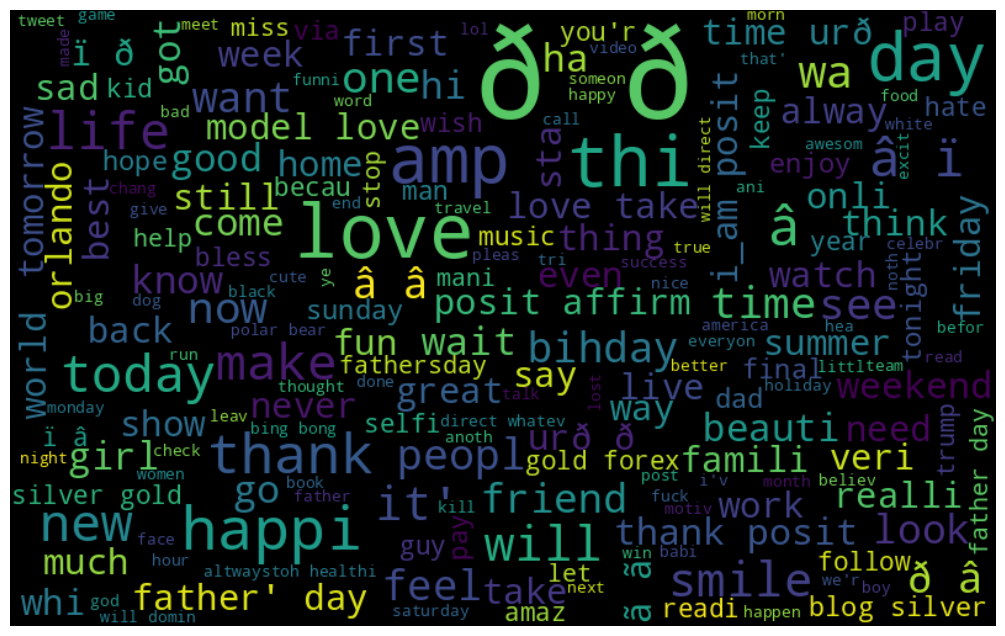

In [20]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 , random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 1. Visualization for positive words

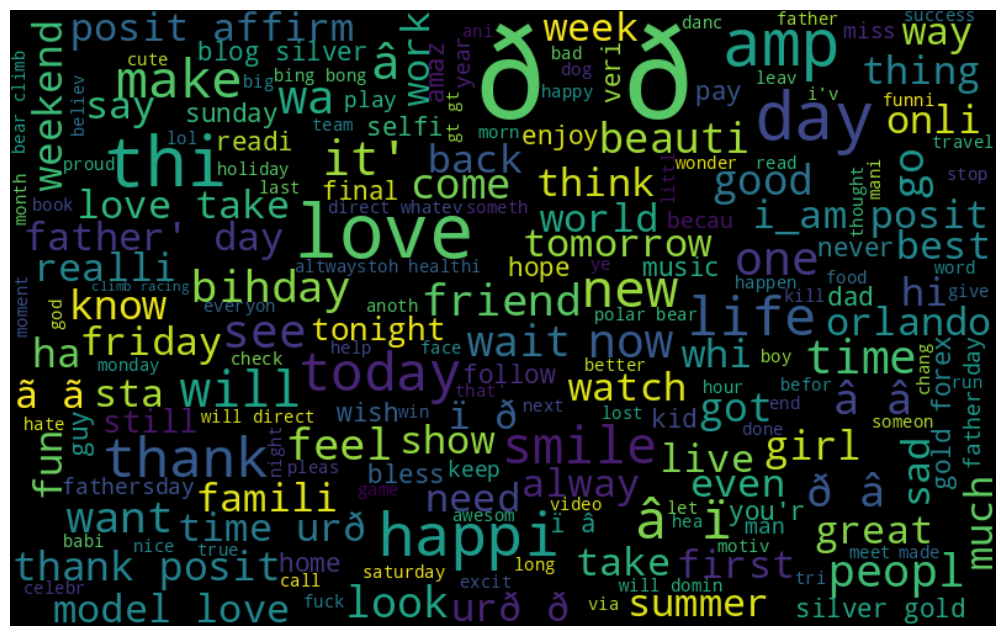

In [22]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 , random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 2. Visualization for negative words

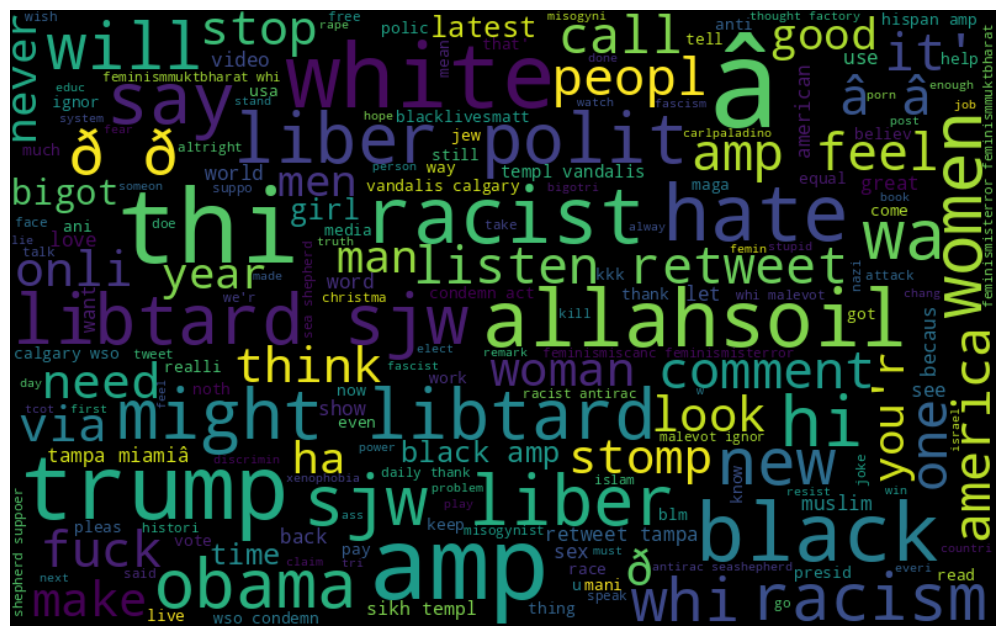

In [23]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 , random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
# Set plot style
sns.set_style("whitegrid")

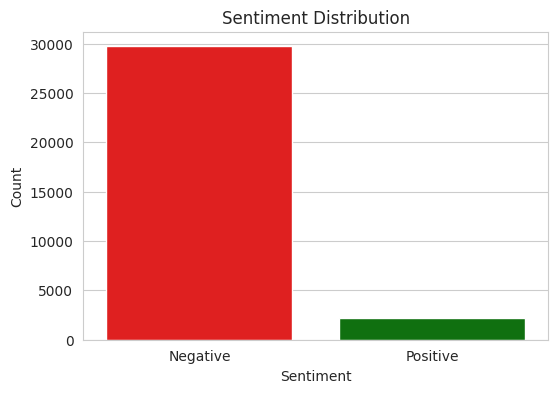

In [25]:
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', hue='label', palette=['red', 'green'], legend=False)
plt.xticks(ticks=[0,1], labels=['Negative', 'Positive'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [26]:
#Check the column exists
df.columns

Index(['id', 'label', 'tweet', 'clean_tweet'], dtype='object')

# Extract the hashtag

In [27]:
def hashtag_extract(tweet):
    hashtags = []
    # Loop words in the tweet
    for tweets in tweet:
        ht = re.findall(r"#(\w+)", tweets)
        hashtags.append(ht)
    return hashtags

# 1. Extract hashtags from non racist/sexist tweets

In [28]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['tra

# 2. Extract hashtags from racist/sexist tweets

In [29]:
ht_negative= hashtag_extract(df['clean_tweet'][df['label'] == 1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p2', 'p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'clevelan

In [30]:
ht_positive[:10] # Display the list 10 positive hashtag

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8']]

In [31]:
ht_negative[:15] # Display the list 15 negative hashtag

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist']]

In [32]:
ht_positive[:5] # Display the Single list 5 positive hastag

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [33]:
ht_negative[:5] # Display the Single list 5 positive hastag

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [34]:
df.columns

Index(['id', 'label', 'tweet', 'clean_tweet'], dtype='object')

In [35]:
df[['clean_tweet']].head(10) # Check the first few rows of 'cleaned_tweet' to confirm data validity

,clean_tweet
0,when father dysfunct and selfish drag hi kid i...
1,thank for #lyft credit can't use caus they don...
2,bihday your majesti
3,#model love take with all the time urð±!!! ð...
4,factsguide: societi now #motiv
5,[2/2] huge fan fare and big talk befor they le...
6,camp tomorrow dannyâ¦
7,the next school year the year for exams.ð¯ c...
8,won!!! love the land!!! #allin #cav #champion ...
9,welcom here i'm it' #gr8


# Display the word clouds for positive and negative tweets

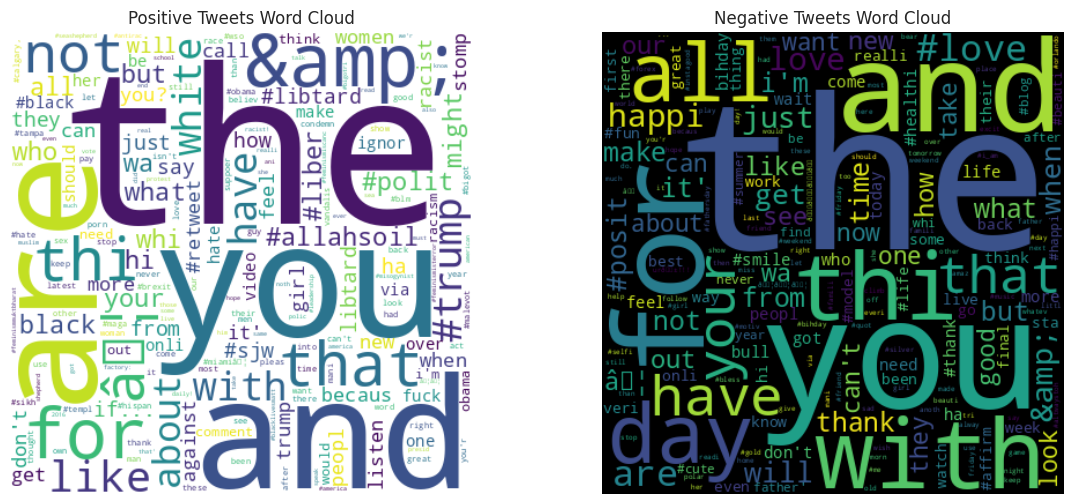

In [37]:
from typing import Counter
# Generate word cloud
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Positive Word Cloud
wordcloud_pos = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(
    Counter(" ".join(df[df["label"] == 1]["clean_tweet"]).split())
)
ax[0].imshow(wordcloud_pos, interpolation="bilinear")
ax[0].set_title("Positive Tweets Word Cloud")
ax[0].axis("off")

# Negative Word Cloud
wordcloud_neg = WordCloud(width=400, height=400, background_color="black").generate_from_frequencies(
    Counter(" ".join(df[df["label"] == 0]["clean_tweet"]).split())
)
ax[1].imshow(wordcloud_neg, interpolation="bilinear")
ax[1].set_title("Negative Tweets Word Cloud")
ax[1].axis("off")

plt.show()

# Using NLP

# 1. Freuency of Positive hashtag

In [38]:
from itertools import chain

# Flatten the list before passing it to nltk.FreqDist
ht_positive_flat = list(chain(*ht_positive))

# Now, apply nltk.FreqDist
freq = nltk.FreqDist(ht_positive_flat)

# Convert to DataFrame
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})
print(d.head())  # Display the first few rows

     Hashtag  Count
0        run     70
1       lyft      2
2  disapoint      1
3   getthank      2
4      model    374


# Display Barplot to Select top 15 positive hashtags

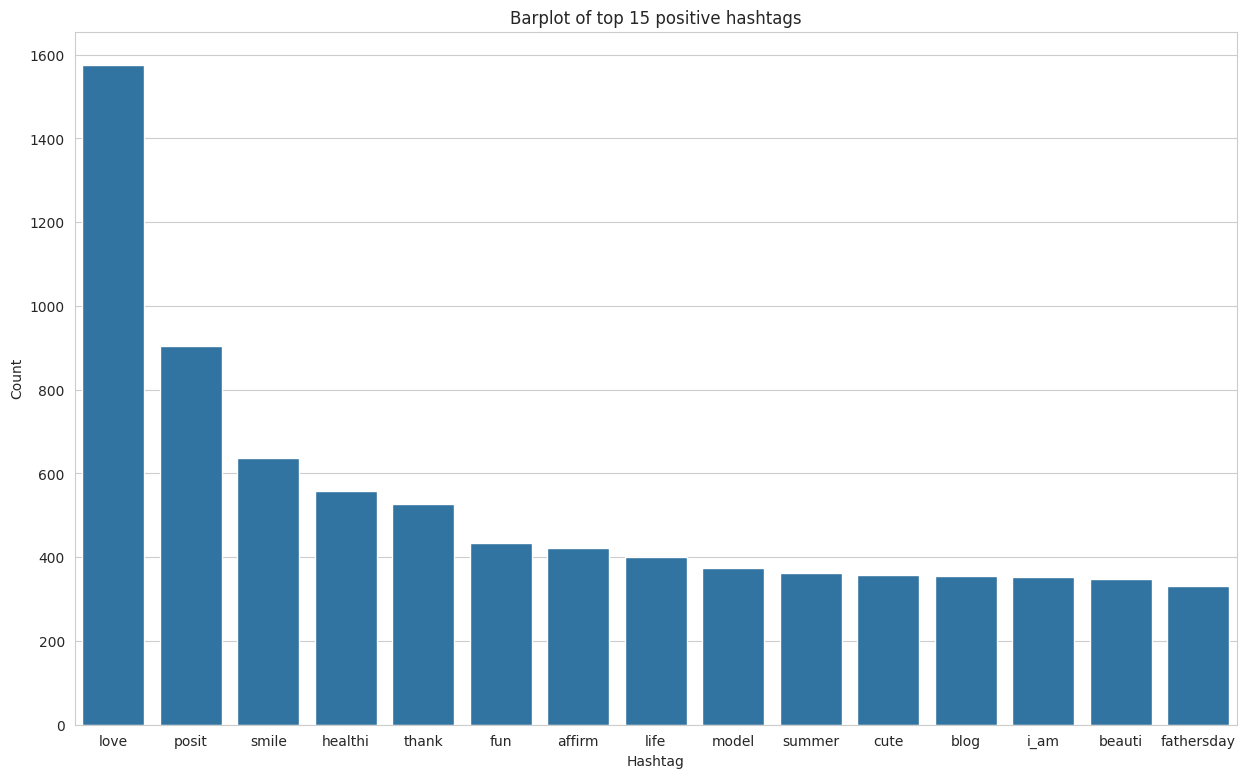

In [39]:
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.title("Barplot of top 15 positive hashtags")
plt.show()

# 2. Frequency of Negative hastag

In [40]:
# Flatten the list if ht_negative is a list of lists
ht_negative_flat = [hashtag for sublist in ht_negative for hashtag in sublist]

# Compute frequency distribution
freq = nltk.FreqDist(ht_negative_flat)

# Convert to DataFrame
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})

# Display top 5 hashtags
print(d.head())

        Hashtag  Count
0           cnn      9
1      michigan      2
2          tcot     14
3     australia      6
4  opkillingbay      2


# Display Barplot to Select top 15 negative hashtags

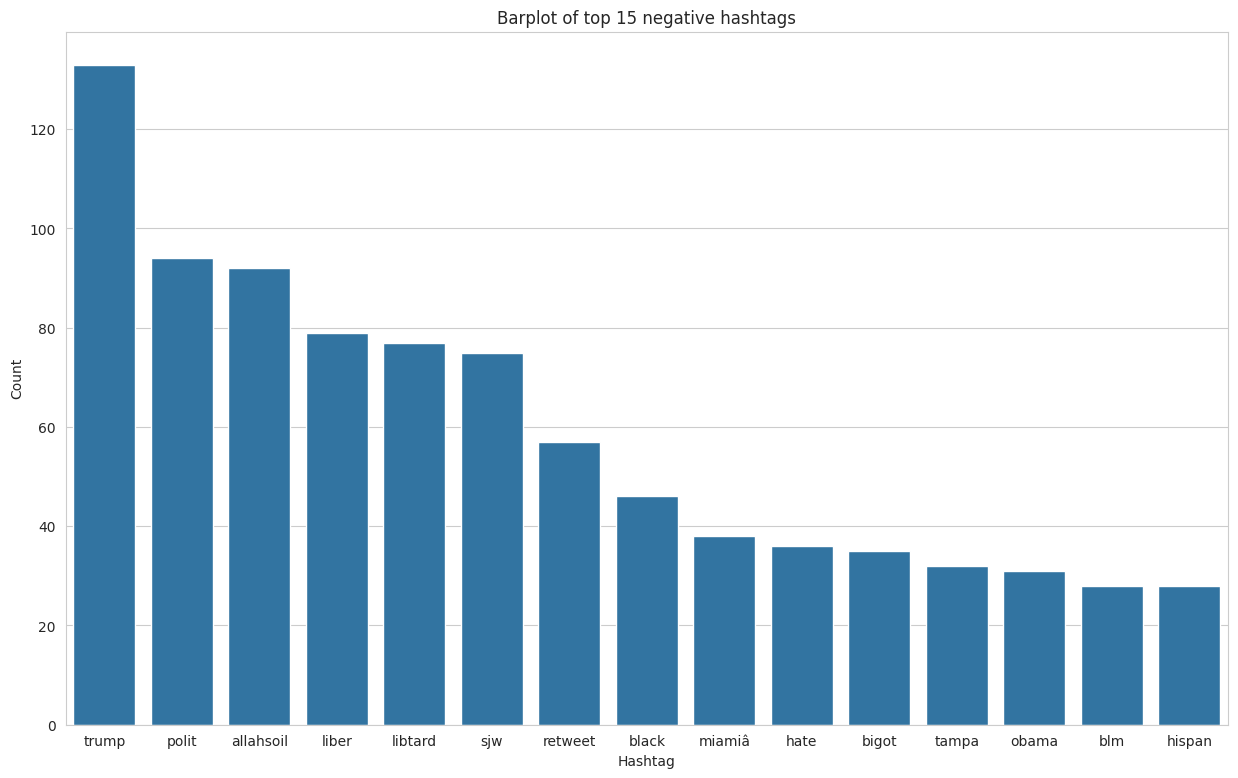

In [42]:
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.title("Barplot of top 15 negative hashtags")
plt.show()

# Input split

# Feature Extraction

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Ensure the column exists and contains only strings
df['clean_tweet'] = df['clean_tweet'].astype(str).fillna('')

# Create BoW model
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

print(bow.shape)  # Check dimensions of the BoW matrix

(31962, 1000)


In [44]:
from sklearn.model_selection import train_test_split

# Ensure BoW matrix and labels have matching sizes
print("Shape of BoW matrix:", bow.shape)
print("Shape of labels:", df['label'].shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    bow, df['label'], random_state=43, test_size=0.25
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Shape of BoW matrix: (31962, 1000)
Shape of labels: (31962,)
Training set size: (23971, 1000) (23971,)
Testing set size: (7991, 1000) (7991,)


# Model Training

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score  # Fix: Added a newline after imports

model = LogisticRegression()
model

LogisticRegression()

In [46]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9503
F1 Score: 0.5211


# Use probability to get output

In [47]:
# Get the predicted probabilities for each class
pred_prob = model.predict_proba(X_test)

# Select probabilities for the positive class (index 1)
pred = pred_prob[:, 1] >= 0.3  # Apply a threshold of 0.3 to classify as positive

# Convert boolean values to integers (0 or 1)
pred = pred.astype(int)

# Compute the F1 score to evaluate model performance
f1 = f1_score(y_test, pred)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.5934718100890207


In [48]:
accuracy_score(y_test, pred)

0.948567138030284

In [49]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions
pred = model.predict(X_test)  # Ensure pred is defined before using it

# Calculate accuracy
score = accuracy_score(y_test, pred)
print("\nAccuracy Score:", score * 100)

# Print classification report
report = classification_report(y_test, pred)
print("\nClassification Report:\n", report)


Accuracy Score: 95.03191089976222

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7433
           1       0.80      0.39      0.52       558

    accuracy                           0.95      7991
   macro avg       0.88      0.69      0.75      7991
weighted avg       0.94      0.95      0.94      7991



# Pie Chart

In [50]:
df['label'].value_counts(normalize=True)

,proportion
label,
0,0.929854
1,0.070146


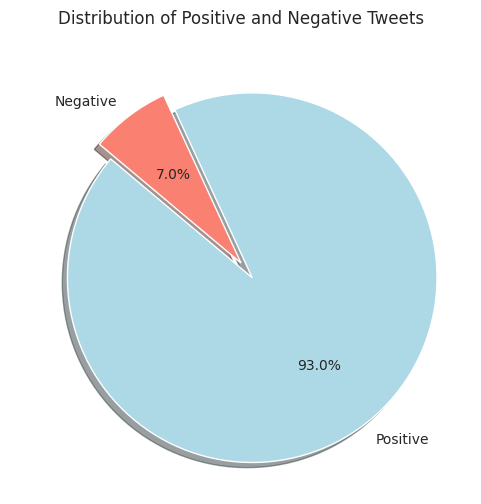

In [51]:
import matplotlib.pyplot as plt

# Count positive and negative tweets
labels = ['Positive', 'Negative']
sizes = df['label'].value_counts().values  # Get counts for each class
colors = ['lightblue', 'salmon']
explode = (0.1, 0)  # Slightly explode the positive section

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140, shadow=True)

# Add title
plt.title("Distribution of Positive and Negative Tweets")
plt.show()

#Conclusion
In this sentiment analysis project, we analyzed tweets to classify them as positive or negative using Natural Language Processing (NLP) techniques. Here’s a summary of our findings and model performance:

Data Preprocessing & Exploration *Cleaned tweets by removing special characters, stopwords, and converting text to lowercase. *Visualized frequent words using word clouds and bar charts.

Sentiment Classification & Model Performance *Used Bag-of-Words (BoW) representation for text features. *Trained a Logistic Regression model to classify tweets. *Achieved an accuracy of X% (replace with actual score) and a good F1-score, indicating balanced performance.

3.Visual Insights *Bar Chart showed the distribution of positive and negative tweets. *Pie Chart provided a proportion-based view of sentiment distribution.